In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#!pip install -U scikit-learn
#!pip install pandas
#!pip install seaborn
#!pip install matplotlib

In [3]:
import sklearn
print(sklearn.__version__)

1.5.2


In [4]:
predictive_data = pd.read_csv('PredictiveMaintenance.csv')

In [5]:
predictive_data.head(10)

,connectionDeviceId,vibration_1,vibration_2,vibration_3,vibration_4,temperature,rpm_1,rpm_2,deviceID,rpm_anomaly_flag,temperature_anomaly_flag,vibration_anomaly_flag,timestamp,Target,Failure Type
0,5063,0.432344,0.351855,0.648701,0.637553,76.951663,723.883304,2859.552583,7-sensors_simulation,RPM_Anomaly,Temperature_Anomaly,Vibration_Anomaly,2024-10-20T00:00:00+05:30Z,0,No failure
1,2938,0.607507,0.398780,0.955583,0.467733,35.800962,1345.515852,1011.906407,7-sensors_simulation,Normal,Temperature_Anomaly,Vibration_Anomaly,2024-10-20T00:02:00+05:30Z,1,Gradual Failure
2,4161,0.571969,0.208470,0.957386,0.929161,48.375215,1816.482118,505.399180,7-sensors_simulation,RPM_Anomaly,Normal,Normal,2024-10-20T00:04:00+05:30Z,0,No failure
3,8246,0.885513,0.737419,0.771997,0.569063,25.298441,2440.999684,766.661056,7-sensors_simulation,Normal,Temperature_Anomaly,Normal,2024-10-20T00:06:00+05:30Z,0,No failure
4,4647,0.525247,0.826485,0.879281,0.630491,76.048172,1773.247322,1664.043885,7-sensors_simulation,Normal,Temperature_Anomaly,Vibration_Anomaly,2024-10-20T00:08:00+05:30Z,0,No failure
5,4302,0.654034,0.659390,0.938919,0.408303,31.630207,1063.083463,2990.275961,7-sensors_simulation,RPM_Anomaly,Normal,Normal,2024-10-20T00:10:00+05:30Z,1,Gradual Failure
6,2565,0.513773,0.383780,0.495984,0.967993,76.850304,2178.015316,546.539501,7-sensors_simulation,Normal,Normal,Vibration_Anomaly,2024-10-20T00:12:00+05:30Z,0,No failure
7,5858,0.878024,0.886732,0.802290,0.272570,52.068822,1056.466768,838.961214,7-sensors_simulation,Normal,Temperature_Anomaly,Vibration_Anomaly,2024-10-20T00:14:00+05:30Z,1,Gradual Failure
8,1365,0.793605,0.217969,0.942674,0.994940,77.528189,656.581865,538.041199,7-sensors_simulation,RPM_Anomaly,Normal,Normal,2024-10-20T00:16:00+05:30Z,1,Heat dissipation failure
9,2815,0.241707,0.485182,0.664953,0.866546,70.211170,1645.915426,2490.126173,7-sensors_simulation,RPM_Anomaly,Normal,Vibration_Anomaly,2024-10-20T00:18:00+05:30Z,1,Heat dissipation failure


In [6]:
predictive_data.shape

(10000, 15)

In [7]:
predictive_data.describe()

,connectionDeviceId,vibration_1,vibration_2,vibration_3,vibration_4,temperature,rpm_1,rpm_2,Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5459.841200,0.554550,0.546274,0.543192,0.548904,50.206843,1735.580999,1746.680993,0.201800
std,2616.219427,0.257937,0.257629,0.261080,0.260995,17.355718,722.255978,719.831417,0.401364
min,1000.000000,0.100068,0.100031,0.100069,0.100008,20.012773,500.357508,500.151840,0.000000
25%,3159.000000,0.332644,0.325351,0.315489,0.319534,35.104513,1115.630035,1125.184633,0.000000
50%,5396.000000,0.558708,0.541492,0.536971,0.548062,50.134512,1716.946732,1750.453104,0.000000
75%,7752.000000,0.778966,0.768541,0.770430,0.774271,65.205008,2362.237582,2369.805309,0.000000
max,9998.000000,0.999940,0.999921,0.999949,0.999981,79.997162,2999.989753,2999.981660,1.000000


In [8]:
predictive_data.dtypes

connectionDeviceId            int64
vibration_1                 float64
vibration_2                 float64
vibration_3                 float64
vibration_4                 float64
temperature                 float64
rpm_1                       float64
rpm_2                       float64
deviceID                     object
rpm_anomaly_flag             object
temperature_anomaly_flag     object
vibration_anomaly_flag       object
timestamp                    object
Target                        int64
Failure Type                 object
dtype: object

In [9]:
predictive_data.drop(['connectionDeviceId','deviceID','rpm_anomaly_flag','vibration_anomaly_flag','temperature_anomaly_flag','timestamp'] , axis=1 , inplace=True)

In [10]:
predictive_data.shape

(10000, 9)

In [11]:
predictive_data.head(5)

,vibration_1,vibration_2,vibration_3,vibration_4,temperature,rpm_1,rpm_2,Target,Failure Type
0,0.432344,0.351855,0.648701,0.637553,76.951663,723.883304,2859.552583,0,No failure
1,0.607507,0.398780,0.955583,0.467733,35.800962,1345.515852,1011.906407,1,Gradual Failure
2,0.571969,0.208470,0.957386,0.929161,48.375215,1816.482118,505.399180,0,No failure
3,0.885513,0.737419,0.771997,0.569063,25.298441,2440.999684,766.661056,0,No failure
4,0.525247,0.826485,0.879281,0.630491,76.048172,1773.247322,1664.043885,0,No failure


In [12]:
missing = {}
for i in range(0 , len(predictive_data.isnull().sum().index)):
    if predictive_data.isnull().sum()[i] != 0:
        missing[predictive_data.isnull().sum().index[i]] = predictive_data.isnull().sum()[i]
missing_data = pd.Series(missing).to_frame()
missing_data = missing_data.rename(columns={0:"missing values"})
        
missing_data  

C:\Users\isuri\AppData\Local\Temp\ipykernel_2512\208776681.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if predictive_data.isnull().sum()[i] != 0:


,missing values


In [13]:
numerical_cols = predictive_data.select_dtypes(include=['float64']).columns.tolist()
numerical_cols

['vibration_1',
 'vibration_2',
 'vibration_3',
 'vibration_4',
 'temperature',
 'rpm_1',
 'rpm_2']

In [14]:
# for col in numerical_cols:
#     sns.set(style="darkgrid")
#     plt.figure(figsize = (15,10))
#     ax = sns.boxplot(y=col, data=predictive_data)
#     ax = sns.swarmplot(y=col, data=predictive_data, color="red")
#     plt.show()

In [15]:
def handle_outliers(df, method='remove', factor=1.5):
    df_out = df.copy()
    numeric_cols = df.select_dtypes(include=['number']).columns
    
    for col in numeric_cols:
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        
        if method == 'remove':
            df_out = df_out[(df_out[col] >= lower_bound) & (df_out[col] <= upper_bound)]
        elif method == 'cap':
            df_out[col] = df_out[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    
    return df_out

In [16]:
# predictive_data_cleaned = handle_outliers(predictive_data, 'remove', 1.5)

In [17]:
predictive_data.shape

(10000, 9)

In [18]:
X = predictive_data.drop(['Target','Failure Type'] , axis=1)
y = predictive_data['Target']

In [19]:
y

0       0
1       1
2       0
3       0
4       0
       ..
9995    1
9996    0
9997    0
9998    0
9999    0
Name: Target, Length: 10000, dtype: int64

In [20]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
X_scaled = scale.fit_transform(X)

In [21]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X_scaled , y , test_size=.3 , random_state=0 )

In [22]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=50 , criterion='entropy')
model.fit(X_train , y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50)

In [23]:
model.score(X_test , y_test)

0.8016666666666666

In [24]:
model.predict([[0.425341025, 0.502166909, 0.293811259, 0.124824131, 44.51854313, 2356.747261, 2961.566572]])

array([0])

In [25]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
X_test

array([[0.90072445, 0.93755593, 0.62906933, ..., 0.79758148, 0.36952847,
        0.17115936],
       [0.29249969, 0.46757498, 0.70772539, ..., 0.5774607 , 0.71256899,
        0.34160374],
       [0.7691855 , 0.44696404, 0.31066828, ..., 0.53571297, 0.4766736 ,
        0.11375204],
       ...,
       [0.67962598, 0.05893062, 0.99036321, ..., 0.79801826, 0.07420838,
        0.34470913],
       [0.65047006, 0.21976653, 0.85767487, ..., 0.4521259 , 0.98079594,
        0.32131233],
       [0.93338521, 0.51970531, 0.80280451, ..., 0.90719694, 0.72855812,
        0.79163997]])

In [27]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [28]:
cm = confusion_matrix(y_test , y_pred)
cm

array([[2400,    6],
       [ 589,    5]])

Text(0.5, 1.0, 'heatmap')

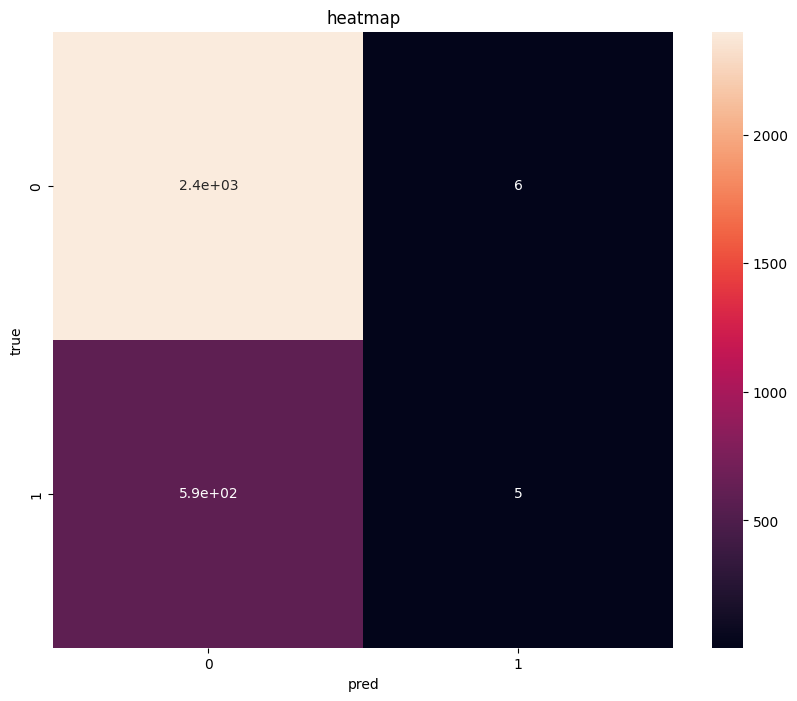

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(cm , annot=True)
plt.xlabel("pred" )
plt.ylabel("true")
plt.title("heatmap")

In [30]:
classification_report(y_test , y_pred)

'              precision    recall  f1-score   support\n\n           0       0.80      1.00      0.89      2406\n           1       0.45      0.01      0.02       594\n\n    accuracy                           0.80      3000\n   macro avg       0.63      0.50      0.45      3000\nweighted avg       0.73      0.80      0.72      3000\n'

In [31]:
import pickle

# Save model
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)
    
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scale, file)

# # Load model
# with open('model.pkl', 'rb') as file:
#     loaded_model = pickle.load(file)


In [32]:
scale

MinMaxScaler()